In [1]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
#MODULE NAME
import os
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import subprocess
import snappy
import imageio
import rasterio as rio
import rasterstats as rs
import rasterio.plot 
from glob import iglob
import geopandas as gpd
from pyspatialml import Raster
import seaborn as sns
from rasterio.plot import show
get_ipython().run_line_magic('matplotlib', 'inline')
#from osgeo import gdal
import prosail
from prosail import spectral_lib
import numpy as np
import numpy.matlib
import numpy as np
from numpy.random import seed
from numpy.random import rand
import numpy.matlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

In [34]:
dataframe = r"C:\Users\bongo\OneDrive\Desktop\Boostraping\PLSR\dataset.xlsx"
df = pd.read_excel(dataframe)
df

,carotenoid,400,401,402,403,404,405,406,407,408,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,2.282087,0.065619,0.065127,0.065294,0.065634,0.065548,0.065315,0.065404,0.065966,0.066737,...,0.111850,0.111529,0.111054,0.111007,0.110787,0.110174,0.109856,0.109756,0.109782,0.109768
1,2.162009,0.069785,0.069826,0.070362,0.070876,0.070950,0.071029,0.071384,0.071899,0.071777,...,0.113591,0.114505,0.114394,0.113856,0.113320,0.112157,0.111929,0.112260,0.111867,0.112044
2,2.998477,0.063132,0.062747,0.062611,0.062457,0.062039,0.062145,0.062412,0.062598,0.062687,...,0.090129,0.090856,0.090595,0.089639,0.089578,0.089729,0.089387,0.089614,0.089466,0.087800
3,2.006669,0.047176,0.047795,0.048406,0.048725,0.048811,0.049058,0.049382,0.049676,0.049807,...,0.082908,0.081787,0.081613,0.081688,0.081208,0.080860,0.080834,0.080509,0.079817,0.079307
4,2.347456,0.054662,0.054591,0.054374,0.054462,0.055194,0.055425,0.055831,0.056427,0.055878,...,0.092096,0.091577,0.091319,0.091903,0.091800,0.091221,0.090924,0.090471,0.090164,0.090046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,6.203996,0.039234,0.040750,0.040579,0.038032,0.038219,0.038509,0.038430,0.038253,0.039037,...,0.025541,0.025518,0.025478,0.025245,0.024947,0.025206,0.025385,0.025038,0.025109,0.024934
156,2.987266,0.032714,0.033617,0.033586,0.032551,0.033513,0.033846,0.033733,0.033790,0.033868,...,0.019435,0.019674,0.019720,0.019509,0.019437,0.019131,0.019313,0.019316,0.018856,0.018748
157,7.809856,0.030664,0.032800,0.033370,0.031739,0.031401,0.031499,0.031277,0.030742,0.032367,...,0.019633,0.019804,0.019681,0.020107,0.020392,0.019958,0.019666,0.019450,0.018931,0.018510
158,7.508983,0.030021,0.031987,0.033174,0.032157,0.031086,0.029949,0.028847,0.028381,0.031030,...,0.018495,0.017909,0.017592,0.017612,0.017643,0.017693,0.017712,0.017950,0.017709,0.017294


In [4]:
measured_car = df.iloc[:,0]

In [5]:
measured_green = df.iloc[:, 111:182]

In [6]:
np.random.seed(45)
krange= 1000
n= 1.1
chloro= 20 + rand(krange)*80
caroten= 2 + rand(krange)*10
brown= 0.1 
EWT= 0.2
LMA=  0.001 + rand(krange)*0.016

In [7]:
rho = np.zeros((krange,2102)) #made it 2102 instaed of 2101 because i included chlorophll, carotenoid, water content and dry matter
for i in range(krange):
    wl, rho[i,0:2101], tau = prosail.run_prospect(n, chloro[i], caroten[i], brown, EWT, LMA[i], prospect_version='5')
    rho[i,-1]=caroten[i]

In [8]:
wl = range(400, 2502) 
df2 = pd.DataFrame(rho, columns=list(wl))
df2 = df2.rename(columns = {2501: 'caroten'})

Inversion of selected bands using Look-up Table (LUT)

In [9]:
simulated_X = df2.iloc[:, 110:181]
measured_X = df.iloc[:, 111:182]

In [10]:
meas=np.array(measured_X)
car = []
for i in np.arange(160):
    mses=np.sum((np.array(simulated_X)-meas[i,:])**2,axis=1)
    ind=np.argmin(mses)
    car.append(caroten[ind])
    print(ind, mses[ind])
    
car = pd.DataFrame(car, columns = ['caroten'])

570 0.9456999652111293
570 0.3023010810290148
570 0.08796754246218857
570 0.09090627424897953
570 0.23443236903999873
570 0.017244425771343247
570 0.04114358290278694
570 0.022445028056241805
570 0.06037056658798498
570 0.0822841517307051
438 0.00021426589789124093
911 0.00046390381701422477
955 0.0005862083188629476
489 0.00046084353585559124
383 0.00043691651952405087
733 0.00024732619386161667
807 0.0003503428103554144
922 0.00019579777879948865
116 0.00018320001500227165
383 0.0003130051081869787
104 0.0001764087862373892
530 0.00023690690753429375
716 0.0052493793003192445
957 0.002050270124289684
226 0.0005493976834057582
836 0.0014073200076034475
661 0.0004285448931164332
190 0.0005781031490391095
91 0.00023457956765012136
176 0.0001816862129296852
570 0.08870965664421844
570 0.01791837325534977
341 0.00022274507568482166
341 0.0003819973549995283
916 0.00018285038307600242
344 0.0001284297025952904
438 0.0003419357665816477
817 0.0003962074097500761
911 0.0008108820707807028
57

In [11]:
new_data_simulated = simulated_X.T
new_data_measured = measured_X.T

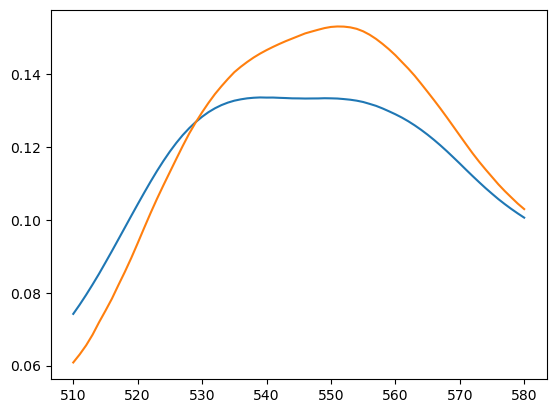

In [12]:
best_simulated = new_data_simulated[[716]]
plt.plot(best_simulated);
plt.plot(simulated_X .columns, meas[159,:])

In [ ]:
#measured_car, car

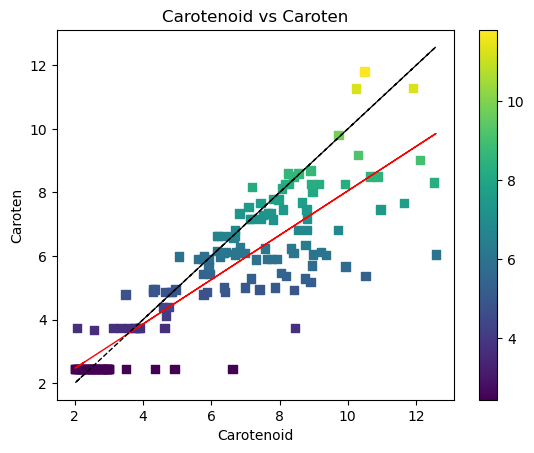

In [30]:
carot = pd.concat([measured_car, car], axis = 1)
# Fit a linear regression line
a, b = np.polyfit(carot['carotenoid'], carot['caroten'], deg=1)

# Create the scatter plot with graduated colors
ax1 = carot['carotenoid']
ax2 = carot['caroten']
colors = carot['caroten'] # Use the caroten column to determine the color of each point
plt.scatter(ax1, ax2, c=colors, cmap='viridis', marker='s')

# Plot the linear regression line
plt.plot(ax1, a*ax1+b, color='red', linestyle='-', linewidth=1)

# Add the 1:1 line
plt.plot(ax1, ax1, color='black', linestyle='--', linewidth=1)

# Add colorbar
plt.colorbar()

# Add labels and title
plt.xlabel('Carotenoid')
plt.ylabel('Caroten')
plt.title('Carotenoid vs Caroten')
plt.show()

0.8664923240598099


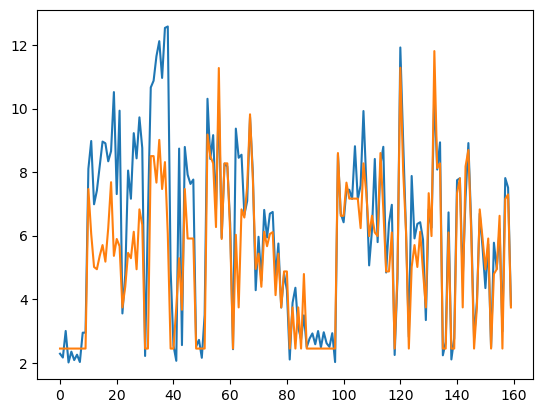

In [23]:
plt.plot(ax1)
plt.plot(ax2)
print(np.corrcoef(ax1, ax2)[0,1])

In [24]:
corr_matrix = numpy.corrcoef(ax1, ax2)
corr = corr_matrix[0,1]
R_sq = corr**2
print(R_sq)

0.7508089476545706


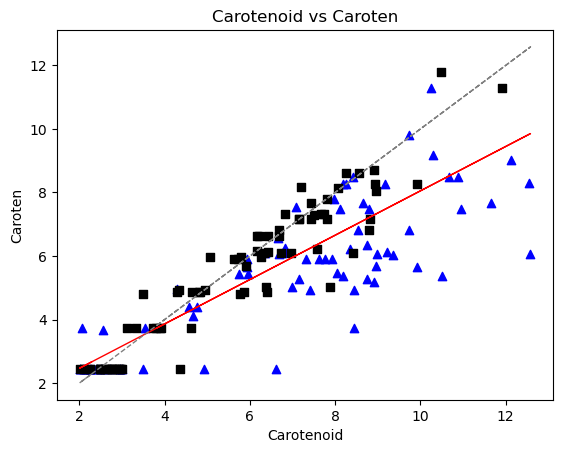

In [32]:
# Fit a linear regression line
a, b = np.polyfit(carot['carotenoid'], carot['caroten'], deg=1)

# Create the scatter plot with different shapes and colors for the two datasets
savanna_idx = range(0, 78)
tropical_idx = range(78, 160)

plt.scatter(carot['carotenoid'][savanna_idx], carot['caroten'][savanna_idx], color='blue', marker='^', label='Savanna')
plt.scatter(carot['carotenoid'][tropical_idx], carot['caroten'][tropical_idx], color='black', marker='s', label='Tropical Forest')

# Plot the linear regression line
plt.plot(carot['carotenoid'], a*carot['carotenoid']+b, color='red', linestyle='-', linewidth=1)

# Add the 1:1 line
plt.plot(carot['carotenoid'], carot['carotenoid'], color='gray', linestyle='--', linewidth=1)

# Add legend
#plt.legend()

# Add labels and title
plt.xlabel('Carotenoid')
plt.ylabel('Caroten')
plt.title('Carotenoid vs Caroten')
plt.show()